In [69]:
import requests
import pprint
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

from api_keys import greater_schools_api_key


In [70]:
#parameters of the search- for practice prior to adding in csv.

city = "atlanta"
state = 'ga'
value = 10
level = 'h' #Valid values: e, m,h
school_type = "private" # Valid values: "public", "charter", "private"
limit = 49 #max 50

headers = {
  'X-API-Key': greater_schools_api_key
}


In [71]:
zipcodes_school = []

#read in the zipcode 
with open('output-data/zipcodes.csv','r') as csv_file:
    zipcodes_csv = csv.reader(csv_file, delimiter=',')
    #loop through the zipcode csv and find the schools associated with that.
    line_count = 0
    for row in zipcodes_csv:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1

        else:
            print(row)
            zipcode = int(row[1])
            url = f'https://gs-api.greatschools.org/schools?zip={zipcode}&limit={limit}&value={value}level_codes={level}'
            response = requests.request("GET", url, headers=headers)
            schools = response.json()
            zipcodes_school.append(schools)
            #print(row[1])
            #print(schools)
            
            line_count += 1

        print(f'Processed {line_count} lines.')



Column names are , Zipcode, City, State, Distance from Origin
Processed 1 lines.
['0', '30303', 'Atlanta', 'GA', '0.0']
Processed 2 lines.
['1', '30302', 'Atlanta', 'GA', '0.25']
Processed 3 lines.
['2', '30321', 'Atlanta', 'GA', '0.25']
Processed 4 lines.
['3', '30343', 'Atlanta', 'GA', '0.25']
Processed 5 lines.
['4', '30353', 'Atlanta', 'GA', '0.25']
Processed 6 lines.
['5', '30358', 'Atlanta', 'GA', '0.25']
Processed 7 lines.
['6', '30370', 'Atlanta', 'GA', '0.25']
Processed 8 lines.
['7', '30374', 'Atlanta', 'GA', '0.25']
Processed 9 lines.
['8', '30392', 'Atlanta', 'GA', '0.25']
Processed 10 lines.
['9', '30394', 'Atlanta', 'GA', '0.25']
Processed 11 lines.
['10', '30334', 'Atlanta', 'GA', '0.27']
Processed 12 lines.
['11', '31136', 'Atlanta', 'GA', '0.51']
Processed 13 lines.
['12', '30312', 'Atlanta', 'GA', '0.73']
Processed 14 lines.
['13', '30313', 'Atlanta', 'GA', '1.12']
Processed 15 lines.
['14', '30308', 'Atlanta', 'GA', '1.53']
Processed 16 lines.
['15', '30332', 'Atlant

In [72]:
pprint.pprint(zipcodes_school)

[{'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 206,
               'district-name': 'Department Of Human Resources',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.753963,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.390221,
               'name': 'Department Of Human Resources',
               'nces-id': '130002703682',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
               'phone': '(404) 657-0435',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Kipp West Atlanta Young Scholars Academy, a '
                                 'charter school located in Atlanta, GA, '
                                 'serves grades 5-8 in the Atlanta Public '
                                 'Schools.It has received a GreatSchools '
                                 'Rating of 5 out of 10, based on a variety of '
                                 'school quality measures.',
               'state': 'GA',
               'state-id': '7610605',
               'street': '350 Temple Street Northwest',
               'type': 'charter',
               'universal-id': '1303025',
               'web-site': 'http://www. Kipp

               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.720852,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.413193,
               'name': 'Sylvan Hills Pre-School Academy',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/4207-Sylvan-Hills-Pre-School-Academy/',
               'phone': '(404) 758-8888',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Rat

               'zip': '30309'}]},
 {'schools': [{'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 371-7168',
               'fipscounty': 13089,
               'lat': 33.769981,
               'level': 'KG,1,2,3,4,5',
               'level-codes': 'e',
               'lon': -84.339706,
               'name': 'Lin Elementary School',
               'nces-id': '130012000136',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/107-Lin-Elementary-School/',
               'phone': '(404) 802-8850',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how 

               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 624-2013',
               'fipscounty': 13121,
               'lat': 33.716602,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.364799,
               'name': 'Benteen Elementary School',
               'nces-id': '130012000073',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/66-Benteen-Elementary-School/',
               'phone': '(404) 802-7300',
               'rating': '2',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students.

               'fax': '(404) 624-2111',
               'fipscounty': 13121,
               'lat': 33.739578,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.361771,
               'name': 'Maynard H. Jackson- Jr. High School',
               'nces-id': '130012001939',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/120-Maynard-H.-Jackson--Jr.-High-School/',
               'phone': '(404) 802-5200',
               'rating': '5',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
               

               'overview-url': 'https://www.greatschools.org/georgia/atlanta/7345-Heritage-Child-Development-Center/',
               'phone': '(404) 622-7477',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                           

               'phone': '(404) 799-0337',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Montessori In Town, a private school located '
                                 'in Atlanta, GA, serves grades PK-6 in the .',
               'state': 'GA',
               'state-id': None,


               'phone': '(678) 515-8368',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

               'web-site': 'http://discoverymontessoriacademy.com',
               'year': None,
               'zip': '30344'},
              {'city': 'East Point',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.69701,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12,UG',
               'level-codes': 'p,e,m,h',
               'lon': -84.431267,
               'name': 'Cameron Academy',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/east-point/4033-Cameron-Academy/',
               'phone': '(404) 281-3667',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
      

               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                   

              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.760757,
               'level': 'KG,1,2,3,4,5,6,7,8',
               'level-codes': 'e,m',
               'lon': -84.292862,
               'name': 'The Hirsch Academy',
               'nces-id': 'A0790069',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/6281-The-Hirsch-Academy/',
               'phone': '(404) 378-9706',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school se

               'universal-id': '1300044',
               'web-site': 'http://www.apskids.org/humphries/html/index.htm',
               'year': 2022,
               'zip': '30354'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.671005,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.361679,
               'name': 'South Atlanta High School',
               'nces-id': '130012004240',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8765-South-Atlanta-High-School/',
               'phone': '(404) 802-5050',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
             

                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'John Robert Lewis Elementary School, a '
                                 'public school located in Atlanta, GA, serves '
                                 'grades PK-5 in the Dekalb County School '
                                 'District.It has received a GreatSchools '
                                 'Rating of 5 out of 10, based on a variety of '
                                 'school quality measures.',
               'state': 'GA',
               'state-id': '6441102',
               'street': '2383 North Druid Hills Road Northeast',
               'type': 'public',
               'universal-id': '1308746',
               'web-site': None,
               'year': 2022,
               'zip': '30329'},
            

               'lon': -84.235046,
               'name': 'All Gods Children Academy',
               'nces-id': 'A0970728',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/6849-All-Gods-Children-Academy/',
               'phone': '(404) 284-8631',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic prog

               'fax': '(678) 874-6010',
               'fipscounty': 13089,
               'lat': 33.827911,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.287865,
               'name': 'Coralwood Education Center',
               'nces-id': '130174000635',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/697-Coralwood-Education-Center/',
               'phone': '(678) 874-6002',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                   

               'street': '1902 Clairmont Road',
               'type': 'private',
               'universal-id': '1308685',
               'web-site': None,
               'year': None,
               'zip': '30033'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.799164,
               'level': 'KG,1,2,3,4,5,6,7,8,9,10',
               'level-codes': 'e,m,h',
               'lon': -84.306938,
               'name': '21 Century STEM Academy',
               'nces-id': 'A1790188',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/8857-21-Century-STEM-Academy/',
               'phone': '(404) 343-2447',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a sta

               'name': 'Lovett School',
               'nces-id': '01646675',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2000-Lovett-School/',
               'phone': '(404) 262-3032',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'cou

               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                    

               'fax': None,
               'fipscounty': 13121,
               'lat': 33.755337,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.525574,
               'name': 'Miles Elementary School',
               'nces-id': '130012000063',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/58-Miles-Elementary-School/',
               'phone': '(404) 802-8900',
               'rating': '2',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (belo

                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Imhotop Academy, a private school located in '
                                 'Atlanta, GA, serves grades PK-8 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '667 Fairburn Road Northwest',
               'type': 'private',
               'universal-id': '1308931',
               'web-site': None,
               'year': None,
               'zip': '30331'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': None,
               'fipscounty': 13121,
              

               'type': 'charter',
               'universal-id': '1303634',
               'web-site': None,
               'year': 2022,
               'zip': '30319'},
              {'city': 'Brookhaven',
               'county': 'DeKalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 874-7810',
               'fipscounty': 13089,
               'lat': 33.841328,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.337189,
               'name': 'Woodward Elementary School',
               'nces-id': '130174000668',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/723-Woodward-Elementary-School/',
               'phone': '(678) 874-7802',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state base

               'state': 'GA',
               'state-id': None,
               'street': '1662 West Rugby Avenue',
               'type': 'private',
               'universal-id': '1309139',
               'web-site': None,
               'year': None,
               'zip': '30337'}]},
 {'schools': [{'city': 'Decatur',
               'county': 'Dekalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.699799,
               'level': 'PK,KG,1,2,3',
               'level-codes': 'p,e',
               'lon': -84.251503,
               'name': 'Rainbow Park Baptist Church School',
               'nces-id': '01929085',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/2016-Rainbow-Park-Baptist-Church-School/',
               'phone': '(404) 284-6969',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents

                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Hoke-Mcneal Academy, a private school '
                                 'located in Decatur, GA, serves grades PK-K '
                                 'in the .',
               'state': 'GA',
               'state-id': None,
               'street': '3055 River Oak Mews',
               'type': 'private',
               'universal-id': '1307071',

               'level': 'PK,TK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.281288,
               'name': 'Shallowford Presbyterian School',
               'nces-id': 'A1701368',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8996-Shallowford-Presbyterian-School/',
               'phone': '(404) 321-3061',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and ca

In [74]:
#Parsing the Data from the API.

#Make an empty list 
specific_schools = []

#loop through the dictionaries and lists to get to the specific values.
for schools in zipcodes_school:
    for key,value in schools.items():
        for school_info in value:
            specific_schools.append(school_info)

pprint.pprint(specific_schools)


[{'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 206,
  'district-name': 'Department Of Human Resources',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.753963,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.390221,
  'name': 'Department Of Human Resources',
  'nces-id': '130002703682',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
  'phone': '(404) 657-0435',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'read

  'name': 'F. L. Stanton Elementary School',
  'nces-id': '130012000045',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/46-F.-L.-Stanton-Elementary-School/',
  'phone': '(404) 802-7500',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
  

  'universal-id': '1300054',
  'web-site': 'http://www.apskids.org/sylvan/',
  'year': 2022,
  'zip': '30310'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.74197,
  'level': '5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.43483,
  'name': 'Kipp Strive Academy',
  'nces-id': '130012003823',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6441-Kipp-Strive-Academy/',
  'phone': '(404) 753-1530',
  'rating': '7',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include t

  'phone': '(404) 873-6985',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': "The Children's School, a private school

  'universal-id': '1300062',
  'web-site': 'http://www.apskids.org/thomasville/',
  'year': 2022,
  'zip': '30315'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.689144,
  'level': '5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.366982,
  'name': 'KIPP Vision Academy',
  'nces-id': '130012003992',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6440-KIPP-Vision-Academy/',
  'phone': '(404) 537-5252',
  'rating': '7',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can in

  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Light of the World of Atlanta, a private school located '
          

                    'on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7611415',
  'street': '20 Evelyn Way Northwest',
  'type': 'public',
  'universal-id': '1308760',
  'web-site': None,
  'year': 2022,
  'zip': '30318'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.77438,
  'level': '6,7',
  'level-codes': 'm',
  'lon': -84.449181,
  'name': 'John Lewis Invictus Academy',
  'nces-id': '130012004276',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8781-John-Lewis-Invictus-Academy/',
  'phone': '(404) 802-6100',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its

  'lat': 33.699608,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.48896,
  'name': 'Therrell High School',
  'nces-id': '130012004215',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/63-Therrell-High-School/',
  'phone': '(404) 802-5300',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                

  'overview-url': 'https://www.greatschools.org/georgia/atlanta/4298-My-Little-Lambs-Christian-Day/',
  'phone': '(404) 305-9944',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school select

  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.838173,
  'level': 'KG',
  'level-codes': 'e',
  'lon': -84.373077,
  'name': 'The Suzuki School',
  'nces-id': 'A0970970',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6876-The-Suzuki-School/',
  'phone': '(404) 869-1042',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '


  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'The Ellis School of Atlanta, a private school located in '
         

  'lat': 33.671982,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.376427,
  'name': 'Humphries Elementary School',
  'nces-id': '130012000043',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/44-Humphries-Elementary-School/',
  'phone': '(404) 802-8750',
  'rating': '5',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider ot

  'web-site': None,
  'year': 2022,
  'zip': '30329'},
 {'city': 'Atlanta',
  'county': 'Dekalb County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.83707,
  'level': 'PK,TK,KG,1,2,3',
  'level-codes': 'p,e',
  'lon': -84.313972,
  'name': 'Maylan International Academy',
  'nces-id': 'A1701345',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8951-Maylan-International-Academy/',
  'phone': '(404) 448-1818',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readine

 {'city': 'Decatur',
  'county': 'Dekalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-1810',
  'fipscounty': 13089,
  'lat': 33.73201,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.246605,
  'name': 'Snapfinger Elementary School',
  'nces-id': '130174000696',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/748-Snapfinger-Elementary-School/',
  'phone': '(678) 874-1802',
  'rating': '1',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic

  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 676-5910',
  'fipscounty': 13089,
  'lat': 33.803833,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.261787,
  'name': 'Mclendon Elementary School',
  'nces-id': '130174000738',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/784-Mclendon-Elementary-School/',
  'phone': '(678) 676-5902',
  'rating': '5',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                      

  'nces-id': '02022055',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2045-Springmont-School-In-Atlanta/',
  'phone': '(404) 252-3910',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as p

  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 699-4569',
  'fipscounty': 13121,
  'lat': 33.769581,
  'level': '6,8',
  'level-codes': 'm',
  'lon': -84.498756,
  'name': 'Harper-Archer Middle School',
  'nces-id': '130012003029',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3023-Harper-Archer-Middle-School/',
  'phone': '(404) 802-6500',
  'rating': '1',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance da

                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Fickett Elementary School, a public school located in '
                    'Atlanta, GA, serves grades PK-5 in the Atlanta Public '
                    'Schools.It has received a GreatSchools Rating of 4 out of '
                    '10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7613559',
  'street': '3935 Rux Road Southwest',
  'type': 'public',
  'universal-id': '1300083',
  'web-site': 'http://www.apskids.org/fickett/',
  'year': 2022,
  'zip': '30331'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'la

  'phone': '(404) 362-3820',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Anderson Elementary School, a public sch

  'web-site': 'kittredgemagnet.com',
  'year': 2022,
  'zip': '30319'},
 {'city': 'Atlanta',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.853821,
  'level': 'KG,1,2,3,4,5,6',
  'level-codes': 'e',
  'lon': -84.339226,
  'name': 'The Piedmont School of Atlanta',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8328-The-Piedmont-School-Of-Atlanta/',
  'phone': '(404) 382-8200',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        '

  'overview-url': 'https://www.greatschools.org/georgia/decatur/2064-Cathedral-Academy/',
  'phone': '(404) 326-5132',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
      

  'fax': '(678) 874-1710',
  'fipscounty': 13089,
  'lat': 33.704666,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.224915,
  'name': 'Rainbow Elementary School',
  'nces-id': '130174000699',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/750-Rainbow-Elementary-School/',
  'phone': '(678) 874-1702',
  'rating': '5',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                      

  'phone': '(678) 510-1214',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Little Da Vinci International School, a

In [75]:
zipcode_schools_df = pd.DataFrame(specific_schools)
zipcode_schools_df['lat_lon'] = list(zip(zipcode_schools_df["lat"], zipcode_schools_df["lon"]))

zipcode_schools_df.head()

,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,city,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,...,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.753963, -84.390221)"
1,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
4,3300946,A0302043,None,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,Deerfield,...,43.193851,-71.572395,None,0,None,https://www.greatschools.org/new-hampshire/dee...,None,NaN,The GreatSchools Rating helps parents compare ...,"(43.193851, -71.572395)"


In [76]:
#zipcode_schools_df.columns
zipcode_schools_df.describe()


,fipscounty,lat,lon,district-id,year
count,393.000000,393.000000,393.000000,393.000000,174.000000
mean,13208.974555,33.810309,-84.309464,19.536896,2021.977011
std,1418.280185,0.675227,0.915624,42.293125,0.213802
min,13063.000000,33.637798,-84.580475,0.000000,2020.000000
25%,13089.000000,33.711781,-84.434090,0.000000,2022.000000
50%,13121.000000,33.755535,-84.372726,0.000000,2022.000000
75%,13121.000000,33.810410,-84.308289,4.000000,2022.000000
max,33015.000000,43.193851,-71.572395,270.000000,2022.000000


In [77]:
#move the zipcode to the first column
temp_cols = zipcode_schools_df.columns.tolist()
#print(temp_cols)
index=zipcode_schools_df.columns.get_loc("zip")
#print(index)
# shift column 'Name' to first position
first_column = zipcode_schools_df.pop('zip')
  
# insert column using insert(position,column_name,
# first_column) function
zipcode_schools_df.insert(0, 'zip', first_column)
zipcode_schools_df.drop(zipcode_schools_df.index[(zipcode_schools_df["state"] == "NH")],axis=0,inplace=True)
  
zipcode_schools_df.head()
    


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,30303,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,...,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.753963, -84.390221)"
1,30303,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,30303,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,30303,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
5,30334,1306660,None,None,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,...,33.749733,-84.385696,None,0,http://ww2.k12.com/cm/?affl=gr8t&page=sp&schoo...,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"


In [78]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = zipcode_schools_df[zipcode_schools_df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon


In [ ]:
#zipcode_schools_df = zipcode_schools_df.drop([0])
#zipcode_schools_df

In [79]:
zipcode_schools_df_copy = zipcode_schools_df.copy()
zipcode_schools_df['level-codes'].unique()
levels_schools = ['p,e', 'm', 'e,m', 'e', 'p,e,m',]
zipcode_schools_df.drop(zipcode_schools_df[zipcode_schools_df['level-codes'].isin(levels_schools) ].index, inplace = True)
zipcode_schools_df.count()


zip                   100
universal-id          100
nces-id                92
state-id               38
name                  100
school-summary        100
type                  100
level-codes           100
level                 100
street                100
city                  100
state                 100
fipscounty            100
phone                  99
fax                    28
county                100
lat                   100
lon                   100
district-name          38
district-id           100
web-site               46
overview-url          100
rating                 28
year                   29
rating-description    100
lat_lon               100
dtype: int64

In [80]:
# selecting rows based on condition of only in GA
print(zipcode_schools_df['name']) 



0                          Department Of Human Resources
1      Graduation Achievement Center Charter High School
2                                      Wellspring Living
3                             The Life School of Atlanta
5                             K12 International Academy 
                             ...                        
374                                 Lakeside High School
377                                Abm Vietnamese School
382                          Yeshiva Atlanta High School
383                                  The Galloway School
385                North Metro Psychoeducational Program
Name: name, Length: 100, dtype: object


In [81]:
#use Cleaned for ratings information and other areas necessary.

cleaned_zipcode_df = zipcode_schools_df.dropna(inplace=False)
cleaned_zipcode_df.shape


(12, 26)

In [84]:
cleaned_zipcode_df.to_csv('output-data/cleaned_zipcode_df.csv')

In [82]:
#get shape of df
zipcode_schools_df.shape


(100, 26)

In [ ]:
#zipcode_schools_df.count()

In [83]:
#school_by_zip_df = school_by_zip_df.fillna('')
zipcode_schools_df['type'].value_counts()


private    62
public     33
charter     5
Name: type, dtype: int64

In [85]:
rating_sort = cleaned_zipcode_df['rating'].sort_values(ascending=False)
rating_sort
rating = cleaned_zipcode_df['rating'].unique()
#rating

In [86]:
zipcodes_school[0]
len(zipcodes_school)

schools_in_zipcode = []
for s in zipcodes_school:
    if s['schools']== []:
        pass
    else:
        schools_in_zipcode.append(s)

pprint.pprint(schools_in_zipcode)

[{'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 206,
               'district-name': 'Department Of Human Resources',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.753963,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.390221,
               'name': 'Department Of Human Resources',
               'nces-id': '130002703682',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
               'phone': '(404) 657-0435',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                    

               'year': 2022,
               'zip': '30310'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.74197,
               'level': '5,6,7,8',
               'level-codes': 'e,m',
               'lon': -84.43483,
               'name': 'Kipp Strive Academy',
               'nces-id': '130012003823',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6441-Kipp-Strive-Academy/',
               'phone': '(404) 753-1530',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'International Preschools and Kinde

               'lat': 34.0037,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.287498,
               'name': 'Nur Academy',
               'nces-id': 'A9901515',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2378-Nur-Academy/',
               'phone': '(404) 688-8830',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include te

                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Slater Elementary School, a public school '
                                 'located in Atlanta, GA, serves grades PK-5 '
                                 'in the Atlanta Public Schools.It has '
                                 'received a GreatSchools Rating of 2 out 

               'zip': '30316'},
              {'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.709267,
               'level': 'PK,TK,KG',
               'level-codes': 'p,e',
               'lon': -84.308693,
               'name': "Johnson's Learning Center",
               'nces-id': 'A9302966',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2148-Johnsons-Learning-Center/',
               'phone': '(404) 243-1041',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                             

               'state': 'GA',
               'state-id': None,
               'street': '401 Hamilton E Holmes Drive Northwest',
               'type': 'private',
               'universal-id': '1302985',
               'web-site': None,
               'year': None,
               'zip': '30318'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 699-4569',
               'fipscounty': 13121,
               'lat': 33.772373,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.49379,
               'name': 'Bazoline E. Usher/Collier Heights Elmentary School',
               'nces-id': '130012003030',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/30-Bazoline-E.-Usher-Collier-Heights-Elmentary-School/',
               'phone': '(404) 802-5700',
               'r

               'web-site': None,
               'year': None,
               'zip': '30318'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 792-5736',
               'fipscounty': 13121,
               'lat': 33.761143,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.469513,
               'name': 'Douglass High School',
               'nces-id': '130012000089',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/75-Douglass-High-School/',
               'phone': '(404) 802-3100',
               'rating': '2',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                     

               'nces-id': '130012000120',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/96-Crim-High-School/',
               'phone': '(404) 802-5800',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
    

               'zip': '30311'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': '(404) 963-7525',
               'fipscounty': 13121,
               'lat': 33.723316,
               'level': 'KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'e,m,h',
               'lon': -84.463585,
               'name': 'Black Star Educational Institute',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6602-Black-Star-Educational-Institute/',
               'phone': '(404) 963-1713',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture o

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Paul D. West Middle School, a publ

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Friends School Of Atlanta, a private school '
                                 'located in Decatur, GA, serves grades PK-8 '
                                 'in the .',
               'state': 'GA',
               'state-id': None,
               'street': '862 South Columbia Drive',
               'type': 'private',
               'universal-id': '1302134',
               'web-site': 'friendsschoolatlanta.org',
               'year': None,
               'zip': '30030'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district

               'level-codes': 'e,m',
               'lon': -84.28289,
               'name': 'The Ellis School of Atlanta',
               'nces-id': 'BB160833',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/9016-The-Ellis-School-Of-Atlanta/',
               'phone': '(678) 973-0483',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                      

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

               'street': '3039 Briarcliff Road Northeast',
               'type': 'private',
               'universal-id': '1308951',
               'web-site': None,
               'year': None,
               'zip': '30329'},
              {'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.835274,
               'level': '5,6,7,8,9,10,11,12',
               'level-codes': 'e,m,h',
               'lon': -84.324005,
               'name': 'Rivers Academy   Atlanta',
               'nces-id': 'A1701364',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8987-Rivers-Academy---Atlanta/',
               'phone': '(404) 458-5160',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools with

               'rating': '3',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                    

               'type': 'charter',
               'universal-id': '1302742',
               'web-site': None,
               'year': 2022,
               'zip': '30033'},
              {'city': 'Decatur',
               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.832371,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.290413,
               'name': 'Oak Grove Young Childrens School',
               'nces-id': 'BB080566',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/6267-Oak-Grove-Young-Childrens-School/',
               'phone': '(404) 636-7951',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a var

              {'city': 'Avondale Estates',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 676-5210',
               'fipscounty': 13089,
               'lat': 33.77388,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.261894,
               'name': 'Avondale Elementary School',
               'nces-id': '130174000694',
               'overview-url': 'https://www.greatschools.org/georgia/avondale-estates/746-Avondale-Elementary-School/',
               'phone': '(678) 676-5202',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture o

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Lovett School, a private school lo

               'universal-id': '1303633',
               'web-site': None,
               'year': 2022,
               'zip': '30331'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 73,
               'district-name': 'Fulton County School District',
               'fax': '(404) 346-6510',
               'fipscounty': 13121,
               'lat': 33.699875,
               'level': '6,7,8',
               'level-codes': 'm',
               'lon': -84.561035,
               'name': 'Sandtown Middle School',
               'nces-id': '130228003368',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/3696-Sandtown-Middle-School/',
               'phone': '(470) 254-6500',
               'rating': '6',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety o

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Seeds Of Faith Pre-School Inc, a p

 {'schools': [{'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.885578,
               'level': 'PK,TK,KG,1,2,3,4,5,6,7,8',
               'level-codes': 'p,e,m',
               'lon': -84.330208,
               'name': 'Our Lady Of The Assumption Catholic School',
               'nces-id': '00295965',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1851-Our-Lady-Of-The-Assumption-Catholic-School/',
               'phone': '(404) 364-1902',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
        

                                     'part of the school selection process.',
               'school-summary': 'Mcclarin Alternative School, a public school '
                                 'located in College Park, GA, serves grades '
                                 '10-12 in the Fulton County School '
                                 'District.It has received a GreatSchools '
                                 'Rating of 2 out of 10, based on a variety of '
                                 'school quality measures.',
               'state': 'GA',
               'state-id': '6600383',
               'street': '3605 Main St',
               'type': 'public',
               'universal-id': '1301026',
               'web-site': None,
               'year': 2022,
               'zip': '30337'},
              {'city': 'College Park',
               'county': 'Fulton County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               '

               'phone': '(404) 326-5132',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

               'state': 'GA',
               'state-id': '6444064',
               'street': '2801 Kelley Chapel Road',
               'type': 'public',
               'universal-id': '1300750',
               'web-site': None,
               'year': 2022,
               'zip': '30034'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 874-4610',
               'fipscounty': 13089,
               'lat': 33.706787,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.284622,
               'name': 'Flat Shoals Elementary School',
               'nces-id': '130174000725',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/774-Flat-Shoals-Elementary-School/',
               'phone': '(678) 874-4602',
               'rating': '1',
               'rating-descri

               'name': 'Abm Vietnamese School',
               'nces-id': 'BB160917',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8860-Abm-Vietnamese-School/',
               'phone': '(404) 254-3907',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                         

                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Little Da Vinci International Scho

In [87]:
#'zip', 'name', 'school-summary','type', 'level-codes', 'level', 'street', 'city', 'state', 'phone',  'county', 'lat', 'lon', 'district-name', 'district-id', 'rating', 'year', 'rating-description'

df = zipcode_schools_df[['zip', 'name', 'school-summary','type', 
                         'level-codes', 'level', 'street', 'city', 
                         'state', 'phone',  'county', 'lat', 'lon', 
                         'district-name', 'district-id', 'rating', 'lat_lon']]
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating,lat_lon
0,30303,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,GA,(404) 657-0435,Fulton County,33.753963,-84.390221,Department Of Human Resources,206,None,"(33.753963, -84.390221)"
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,None,"(33.760502, -84.387169)"
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73,None,"(33.754742, -84.385574)"
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0,None,"(33.749504, -84.39209)"
5,30334,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(877) 512-7748,Fulton,33.749733,-84.385696,None,0,None,"(33.749733, -84.385696)"


In [ ]:
zipcode_schools_df.to_csv('output-data/schools_per_zipcode.csv')

In [88]:
df = pd.read_csv('output-data/schools_per_zipcode.csv')
df

,Unnamed: 0,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,1,30303,1306933,130023104095,7.820119e+10,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
1,2,30303,1308742,130228004261,6.601321e+06,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",...,33.754742,-84.385574,Fulton County School District,73,NaN,https://www.greatschools.org/georgia/atlanta/8...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
2,3,30303,1309128,A1901569,NaN,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",...,33.749504,-84.392090,NaN,0,NaN,https://www.greatschools.org/georgia/atlanta/9...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
3,5,30334,1306660,NaN,NaN,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",...,33.749733,-84.385696,NaN,0,http://ww2.k12.com/cm/?affl=gr8t&page=sp&schoo...,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"
4,6,30334,1306661,NaN,NaN,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",...,33.749733,-84.385696,NaN,0,http://keystoneschoolonline.com/,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,374,30345,1300770,130174000721,6.443060e+06,Lakeside High School,"Lakeside High School, a public school located ...",public,h,"9,10,11,12",...,33.844547,-84.284828,Dekalb County School District,55,NaN,https://www.greatschools.org/georgia/atlanta/7...,5.0,2022.0,The GreatSchools Rating helps parents compare ...,"(33.844547, -84.284828)"
95,377,30345,1308860,BB160917,NaN,Abm Vietnamese School,"Abm Vietnamese School, a private school locate...",private,"m,h","6,7,8,9,10,11,12",...,33.848419,-84.285812,NaN,0,NaN,https://www.greatschools.org/georgia/atlanta/8...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.848419, -84.285812)"
96,382,30342,1301898,00296991,NaN,Yeshiva Atlanta High School,"Yeshiva Atlanta High School, a private school ...",private,"p,e,m,h","PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12",...,33.895885,-84.366486,NaN,0,NaN,https://www.greatschools.org/georgia/atlanta/1...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.895885, -84.366486)"
97,383,30342,1301960,00298387,NaN,The Galloway School,"The Galloway School, a private school located ...",private,"p,e,m,h","PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12",...,33.875198,-84.393661,NaN,0,http://www.gallowayschool.org,https://www.greatschools.org/georgia/atlanta/1...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.875198, -84.393661)"


In [11]:
#Make variables to use for looping through data.
lon = df['lon'] #x
lat = df['lat'] #y
name = df['name']
lat_lon = df['lat_lon']
print(lat_lon)


0     (33.760502, -84.387169)
1     (33.754742, -84.385574)
2      (33.749504, -84.39209)
3     (33.749733, -84.385696)
4     (33.749733, -84.385696)
               ...           
94    (33.844547, -84.284828)
95    (33.848419, -84.285812)
96    (33.895885, -84.366486)
97    (33.875198, -84.393661)
98    (33.869801, -84.407204)
Name: lat_lon, Length: 99, dtype: object


In [12]:
#Ratings from Niche-- niche sells their data for $9.99 a spreadsheet.
x = 0
for n in df['name']:
    print(n)
    rate = input("Rate: ")
    df.loc[x,'new rating'] = rate
    x += 1
    

Graduation Achievement Center Charter High School
Rate: n/a
Wellspring Living
Rate: n/a
The Life School of Atlanta
Rate: n/a
K12 International Academy 
Rate: B-
The Keystone School 
Rate: n/a
The New School
Rate: A+
The New School Atlanta
Rate: A+
Cristo Rey Atlanta Jesuit High School
Rate: B-
KIPP Atlanta Collegiate
Rate: C+
Booker T. Washington High School
Rate: B-
Bright Futures Academy
Rate: C+
Heavenly Institute Of Learning
Rate: n/a
Tamu S. Kanyama Prep Academy
Rate: n/a
Laurel Heights Academy (Hospital)
Rate: n/a
Uhs Of Laurel Heights
Rate: n/a
Hillside Conant School
Rate: n/a
Midtown High School
Rate: A+
Paideia School
Rate: A+
Horizons School
Rate: n/a
The New School
Rate: A-
Druid Hills High School
Rate: A-
Aps-Forrest Hills Academey
Rate: n/a
Early College High School At Carver
Rate: C+
School Of Technology At Carver
Rate: n/a
Carver High School
Rate: A-
Maynard H. Jackson- Jr. High School
Rate: n/a
Mohammed Schools Of Atlanta
Rate: B+
Clara Mohammed Elementary/W. D
Rate: n/

In [13]:
df.head()

,Unnamed: 0,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,...,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon,new rating
0,1,30303,1306933,130023104095,7.820119e+10,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",...,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)",n/a
1,2,30303,1308742,130228004261,6.601321e+06,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",...,-84.385574,Fulton County School District,73,NaN,https://www.greatschools.org/georgia/atlanta/8...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)",n/a
2,3,30303,1309128,A1901569,NaN,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",...,-84.392090,NaN,0,NaN,https://www.greatschools.org/georgia/atlanta/9...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)",n/a
3,5,30334,1306660,NaN,NaN,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",...,-84.385696,NaN,0,http://ww2.k12.com/cm/?affl=gr8t&page=sp&schoo...,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)",B-
4,6,30334,1306661,NaN,NaN,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",...,-84.385696,NaN,0,http://keystoneschoolonline.com/,https://www.greatschools.org/georgia/atlanta/6...,NaN,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)",n/a


In [14]:
df.to_csv('output-data/schools_rating_v2.csv')

In [ ]:
zipcode_schools_df['type'].value_counts().plot(kind='bar',stacked=True, rot=0)
plt.title("Type of High Schools in the Atlanta Area")
plt.savefig("output-data/types_of_schools.png")
plt.show()

In [ ]:
#Evaluation of school ratings from niche.
labels = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']

df.sort_values('new rating', ascending=False)
df['new rating'].value_counts().plot(kind='pie',labels=labels)
plt.title("Rating of High Schools in the Atlanta Area")
plt.savefig("output-data/Ratings_of_schools.png")

plt.show()

In [15]:
atl_map = gpd.read_file('mygeodata/border_level8_polygon.shp')
atl_map = atl_map.to_crs("EPSG:4326")


In [46]:
new_df = pd.concat([df, atl_map], axis=0, ignore_index=True)
new_df

,Unnamed: 0,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,...,is_in_coun,is_in_co_1,is_in_iso_,is_in_stat,is_in_st_1,place,population,wikidata,wikipedia,geometry
0,1.0,30303.0,1306933.0,130023104095,7.820119e+10,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2.0,30303.0,1308742.0,130228004261,6.601321e+06,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,3.0,30303.0,1309128.0,A1901569,NaN,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,5.0,30334.0,1306660.0,NaN,NaN,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,6.0,30334.0,1306661.0,NaN,NaN,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,382.0,30342.0,1301898.0,00296991,NaN,Yeshiva Atlanta High School,"Yeshiva Atlanta High School, a private school ...",private,"p,e,m,h","PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
97,383.0,30342.0,1301960.0,00298387,NaN,The Galloway School,"The Galloway School, a private school located ...",private,"p,e,m,h","PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
98,385.0,30342.0,1303117.0,130012003033,7.616414e+06,North Metro Psychoeducational Program,"North Metro Psychoeducational Program, a publi...",public,"e,m,h",UG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
99,NaN,NaN,NaN,NaN,NaN,Atlanta,NaN,NaN,NaN,NaN,...,USA,US,US-GA,Georgia,GA,city,486290,Q23556,en:Atlanta,"POLYGON ((-84.42855 33.65760, -84.42698 33.657..."


In [19]:
#Make variables to use for looping through data.
lon = df['lon'] #x
lat = df['lat'] #y
name = df['name']
lat_lon = df['lat_lon']
print(lat_lon)

0     (33.760502, -84.387169)
1     (33.754742, -84.385574)
2      (33.749504, -84.39209)
3     (33.749733, -84.385696)
4     (33.749733, -84.385696)
               ...           
94    (33.844547, -84.284828)
95    (33.848419, -84.285812)
96    (33.895885, -84.366486)
97    (33.875198, -84.393661)
98    (33.869801, -84.407204)
Name: lat_lon, Length: 99, dtype: object


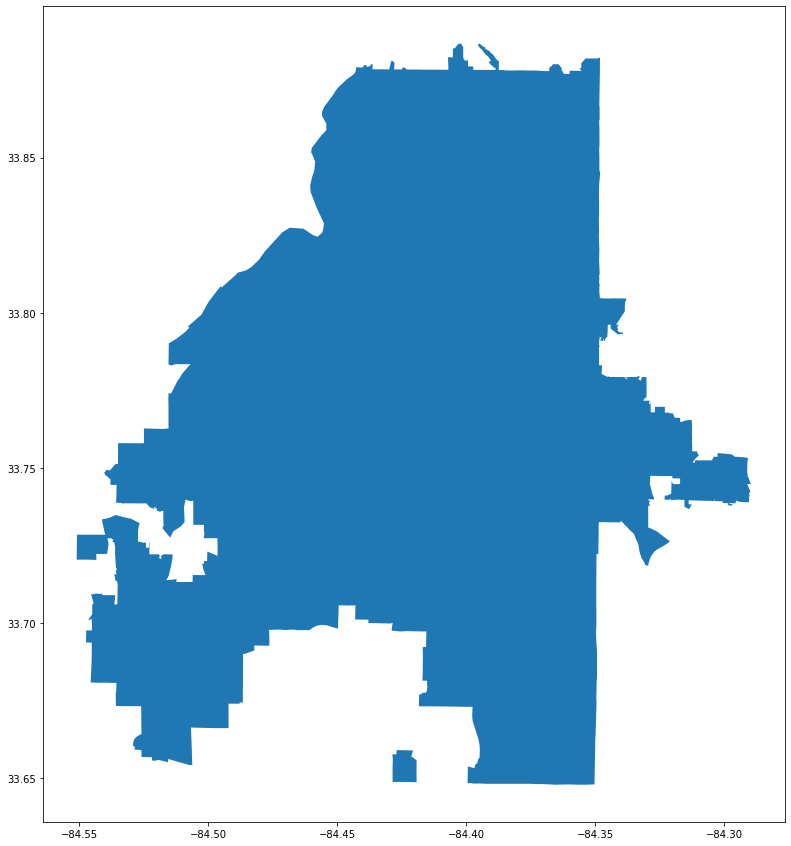

In [29]:
#Geo view using plotly
atl_map.plot(alpha=1,figsize=(15,15))
fig = px.scatter_geo(df, 
                     lat ="lat",
                     lon ="lon",
                     locationmode="ISO-3",
                     size_max = 10,
                     hover_name='new rating', color="name")
fig.show()

In [47]:
x_points = df["lon"]
y_points = df['lat']
#multiple layers

#plot the cities polygons with no fill color

fig = px.scatter(df, x= x_points, y=y_points,
                 hover_name="name", hover_data=["new rating", "zip"])   

fig.show()

In [59]:
zip_codes_shpmap = gpd.read_file('ZIP_Codes/ZIP_Codes.shp')
#zip_codes_shpmap.plot(figsize = (10,10))
zip_codes_shpmap.head()

,OBJECTID,ZIP,GlobalID,last_edite,geometry
0,1,30534,{D2AC7B41-CAB3-4C88-8F0E-21CA8061DB8D},None,"POLYGON ((-84.30229 34.57842, -84.30208 34.578..."
1,2,30531,{0F93CBCF-F21C-4EE3-BBB9-3E1E0F1BA7D2},None,"POLYGON ((-83.64686 34.47594, -83.64749 34.475..."
2,3,30177,{FC6BC41B-C004-4869-80A7-01CF5D96503B},None,"POLYGON ((-84.36438 34.41673, -84.36513 34.414..."
3,4,30501,{F227EFE6-09F3-41CD-B47D-802D3ED7F95E},None,"POLYGON ((-83.88020 34.32201, -83.87727 34.325..."
4,5,30543,{F0DF9EB2-7CDC-4623-A497-29157CEB8203},None,"POLYGON ((-83.70880 34.30056, -83.70693 34.301..."


In [66]:
zip_codes_shpmap.rename(columns = {'ZIP':'zip'}, inplace = True)


In [68]:
data = pd.merge(zip_codes_shpmap, df, on = "zip")
new_merged_df

KeyError: 'zip'

TypeError: '>=' not supported between instances of 'str' and 'float'

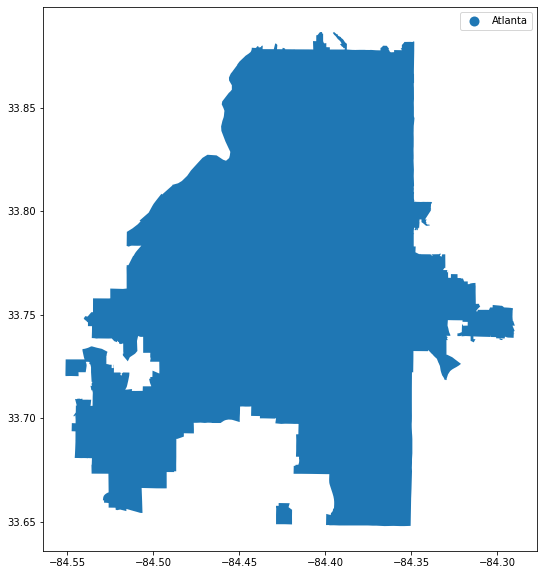

In [18]:
x_points = []
y_points = []
name = []
#multiple layers


#plot the cities polygons with no fill color
atl_map.plot(alpha=1,figsize=(10,10),column='name', legend=True)
#ax = atl_map.plot(ax=ax, column='name', legend=True)
for i in lat_lon:
    if i[0]>=33.87 or i[0]<=33.65:
        pass
    elif i[1]>=-84.29 or i[1]<-84.55:
        pass
    elif i[0]>=33.81 and i[1]>=-84.35:
        pass
    else:
        y_points.append(i[0])
        x_points.append(i[1])
    
schools = plt.scatter(x_points, y_points,c='black')
plt.title('Schools in the Atlanta Area')
plt.legend()
plt.grid()
mpc.cursor(hover=True)
plt.xlabel('longitude')
plt.ylabel('latitude')

print(len(x_points))
print(len(y_points))
plt.savefig("output-data/atlanta_schools.jpg")

plt.show()